In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google. colab import files
from numpy import mean
from numpy import std
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,mean_squared_error,confusion_matrix, precision_score, recall_score, auc,roc_curve
from sklearn import ensemble, linear_model, neighbors, svm, tree
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVC
from sklearn import preprocessing
from sklearn.preprocessing import Normalizer,MinMaxScaler
from matplotlib import cm
from sklearn.manifold import TSNE
import pickle
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/cirrhosis.csv")

In [ ]:
print(df.shape)
columns=df.columns
print(columns)
df.info
df.describe().T

(418, 20)
Index(['ID', 'N_Days', 'Status', 'Drug', 'Age', 'Sex', 'Ascites',
       'Hepatomegaly', 'Spiders', 'Edema', 'Bilirubin', 'Cholesterol',
       'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets',
       'Prothrombin', 'Stage'],
      dtype='object')


,count,mean,std,min,25%,50%,75%,max
ID,418.0,209.500000,120.810458,1.00,105.2500,209.50,313.75,418.00
N_Days,418.0,1917.782297,1104.672992,41.00,1092.7500,1730.00,2613.50,4795.00
Age,418.0,18533.351675,3815.845055,9598.00,15644.5000,18628.00,21272.50,28650.00
Bilirubin,418.0,3.220813,4.407506,0.30,0.8000,1.40,3.40,28.00
Cholesterol,284.0,369.510563,231.944545,120.00,249.5000,309.50,400.00,1775.00
Albumin,418.0,3.497440,0.424972,1.96,3.2425,3.53,3.77,4.64
Copper,310.0,97.648387,85.613920,4.00,41.2500,73.00,123.00,588.00
Alk_Phos,312.0,1982.655769,2140.388824,289.00,871.5000,1259.00,1980.00,13862.40
SGOT,312.0,122.556346,56.699525,26.35,80.6000,114.70,151.90,457.25
Tryglicerides,282.0,124.702128,65.148639,33.00,84.2500,108.00,151.00,598.00


The dataset consists of following columns :
*  ID: unique identifier
*  N_Days: number of days between registration and the earlier of death, transplantation, or study analysis time in July 1986
*   Status: status of the patient C (censored), CL (censored due to liver tx), or D (death)
* Drug: type of drug D-penicillamine or placebo
*   Age: age in [days]
*  Sex: M (male) or F (female)
* Ascites: presence of ascites N (No) or Y (Yes)
* Hepatomegaly: presence of hepatomegaly N (No) or Y (Yes)
*   Spiders: presence of spiders N (No) or Y (Yes) 
*   Edema: presence of edema N (no edema and no diuretic therapy for edema), S (edema present without diuretics, or edema resolved by diuretics), or Y (edema despite diuretic therapy)
*   Bilirubin: serum bilirubin in [mg/dl]
*   Cholesterol: serum cholesterol in [mg/dl]
*   Albumin: albumin in [gm/dl]
*  Copper: urine copper in [ug/day]
*  Alk_Phos: alkaline phosphatase in [U/liter]
*   SGOT: SGOT in [U/ml]
*  Triglycerides: triglicerides in [mg/dl]
*   Platelets: platelets per cubic [ml/1000]
*  Prothrombin: prothrombin time in seconds [s]
*  Stage: histologic stage of disease (1, 2, 3, or 4)




This data set has about 19 features. These features are related to the patient’s details like age, sex, etc. and patient’s blood tests like prothrombin, triglycerides, platelets levels, etc. All these factors help in understanding a patient’s chances of liver cirrhosis.

we have some NA values in our data, lets look at some statistical summary of numerical columns in out dataset.

We have some missing values in our data, lets see how many and in which columns.

In [ ]:
print(df.isna().sum())

ID                 0
N_Days             0
Status             0
Drug             106
Age                0
Sex                0
Ascites          106
Hepatomegaly     106
Spiders          106
Edema              0
Bilirubin          0
Cholesterol      134
Albumin            0
Copper           108
Alk_Phos         106
SGOT             106
Tryglicerides    136
Platelets         11
Prothrombin        2
Stage              6
dtype: int64


**Handling Missing Values**


This is a problem, we could just get rid of all examples with NA values, but in this case our case of small dataset we cannot afford that.

We will impute the missing entries with some statistical calculations.



**We have two different types of data**


Numerical data ( Age, Cholesterol, Platelets.. etc)
Categorical Data ( Drug, Sex, Spiders..etc)
We will have to use different imputation for each type

For the numerical type we can use mean or median. In this case we will go with median to avoid skewing in the presence of outliers
For Categorical type we will impute the most frequent class.

In [ ]:
# For Numerical Type
print(df.select_dtypes(include=(['int64', 'float64'])).isna().sum())

ID                 0
N_Days             0
Age                0
Bilirubin          0
Cholesterol      134
Albumin            0
Copper           108
Alk_Phos         106
SGOT             106
Tryglicerides    136
Platelets         11
Prothrombin        2
Stage              6
dtype: int64


In [ ]:
#Filling the null values with median
df.select_dtypes(include=(['int64', 'float64'])).isna().sum()
df_num_col = df.select_dtypes(include=(['int64', 'float64'])).columns
for c in df_num_col:
    df[c].fillna(df[c].median(), inplace=True)

print(df.select_dtypes(include=(['int64', 'float64'])).isna().sum())

ID               0
N_Days           0
Age              0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
dtype: int64


In [ ]:
# For Categorical type
print(df.select_dtypes(include=('object')).isna().sum())

Status            0
Drug            106
Sex               0
Ascites         106
Hepatomegaly    106
Spiders         106
Edema             0
dtype: int64


In [ ]:
#filling the string values with mode
df_cat_col = df.select_dtypes(include=('object')).columns
for c in df_cat_col:
    df[c].fillna(df[c].mode().values[0], inplace=True)

print(df.select_dtypes(include=('object')).isna().sum())

Status          0
Drug            0
Sex             0
Ascites         0
Hepatomegaly    0
Spiders         0
Edema           0
dtype: int64


In [ ]:
# Converting Target categories into intigers 1 for Cirrhosis, 0 otherwise
df['Stage'] = np.where(df['Stage'] == 4,1,0)

Lets observe some Features with their relation with the disease

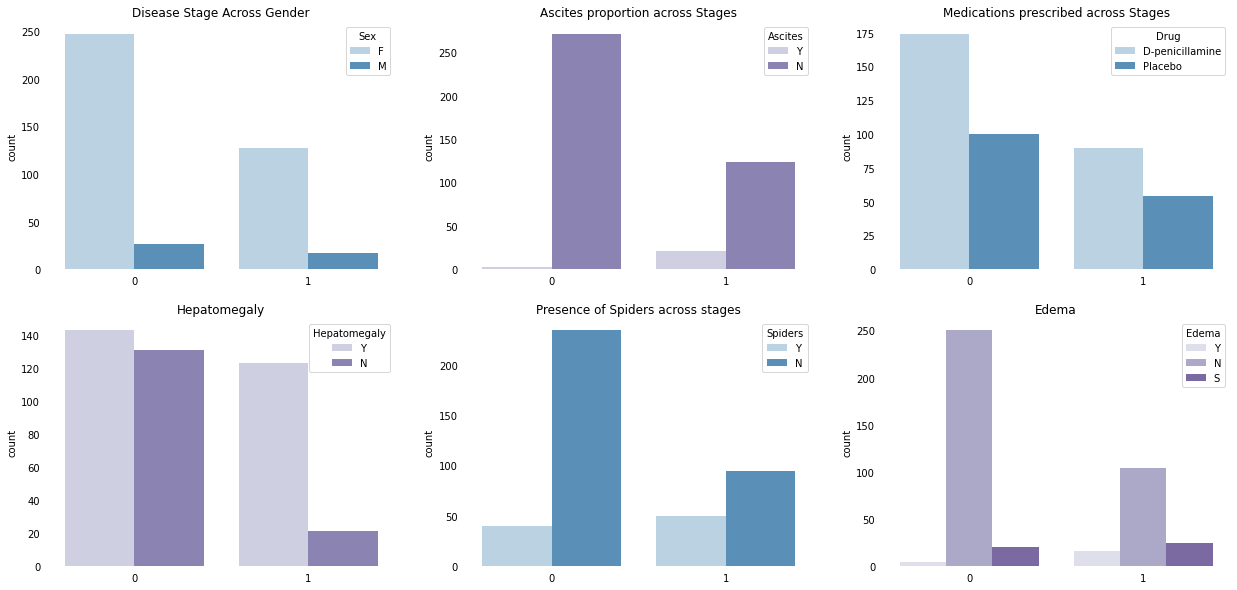

In [ ]:
#@title Plots
plt.figure(figsize=(21.2,10))

plt.subplot(2,3,1)
sns.countplot(x=df['Stage'], hue=df['Sex'], palette='Blues', alpha=0.9)
sns.despine(top=True, right=True, bottom=True, left=True)
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
plt.xlabel('')
plt.title('Disease Stage Across Gender')

plt.subplot(2,3,2)
sns.countplot(x=df['Stage'], hue=df['Ascites'], palette='Purples', alpha=0.9)
sns.despine(top=True, right=True, bottom=True, left=True)
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
plt.xlabel('')
plt.title('Ascites proportion across Stages')

plt.subplot(2,3,3)
sns.countplot(x=df['Stage'], hue=df['Drug'], palette='Blues', alpha=0.9)
sns.despine(top=True, right=True, bottom=True, left=True)
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
plt.xlabel('')
plt.title('Medications prescribed across Stages');

plt.subplot(2,3,4)
sns.countplot(x=df['Stage'], hue=df['Hepatomegaly'], palette='Purples', alpha=0.9)
sns.despine(top=True, right=True, bottom=True, left=True)
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
plt.xlabel('')
plt.title('Hepatomegaly');

plt.subplot(2,3,5)
sns.countplot(x=df['Stage'], hue=df['Spiders'], palette='Blues', alpha=0.9)
sns.despine(top=True, right=True, bottom=True, left=True)
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
plt.xlabel('')
plt.title('Presence of Spiders across stages');

plt.subplot(2,3,6)
sns.countplot(x=df['Stage'], hue=df['Edema'], palette='Purples', alpha=0.9)
sns.despine(top=True, right=True, bottom=True, left=True)
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
plt.xlabel('')
plt.title('Edema');

There are some interesting insights if we observe closely. Take the case at Ascites, we observe that the rist of disease is higher with increase in Ascites. also presence of spiders has a positive relation with disease risk.

In **Disease Stage Across Gender** plot we can observe female are high.
Coming to the medications prescribed across stage uses two types of medicines like D-penicillamine ad Placebo and that to D-penicillamine is mostly prescribed for female compared to male.
Hepatomegaly and Spiders are common sign of liver disease and coming to our data we can clearly observe that Hepatomegaly and Spider are quite opposite when one is increases another is decreased.

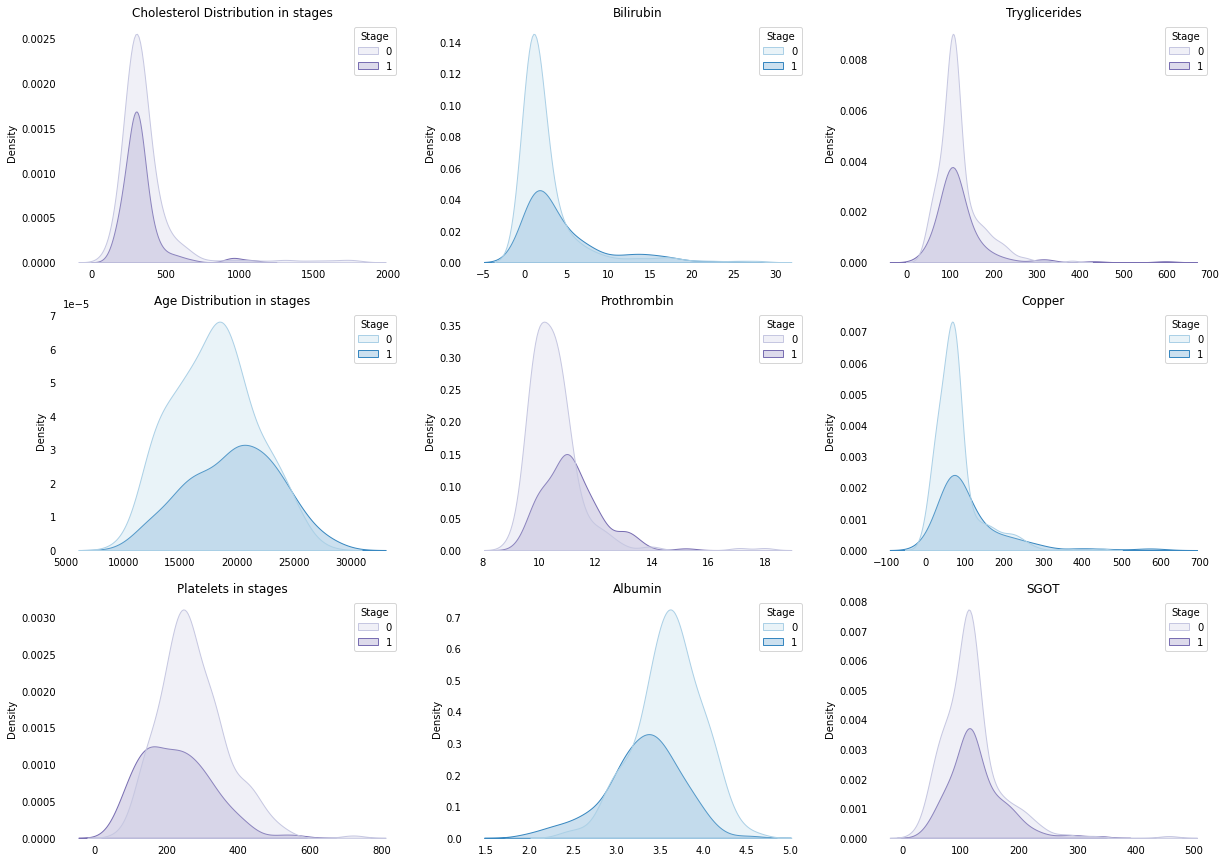

In [ ]:
#@title Distribution Polts
plt.figure(figsize=(20.6,15))

plt.subplot(3,3,1)
sns.kdeplot(df['Cholesterol'], hue=df['Stage'], fill=True, palette='Purples')
sns.despine(top=True, right=True, bottom=True, left=True)
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
plt.xlabel('')
plt.title('Cholesterol Distribution in stages');

plt.subplot(3,3,2)
sns.kdeplot(df['Bilirubin'], hue=df['Stage'], fill=True, palette='Blues', common_norm=True)
sns.despine(top=True, right=True, bottom=True, left=True)
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
plt.xlabel('')
plt.title('Bilirubin');

plt.subplot(3,3,3)
sns.kdeplot(df['Tryglicerides'], hue=df['Stage'], fill=True, palette='Purples', common_norm=True)
sns.despine(top=True, right=True, bottom=True, left=True)
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
plt.xlabel('')
plt.title('Tryglicerides');

plt.subplot(3,3,4)
sns.kdeplot(df['Age'], hue=df['Stage'], fill=True, palette='Blues', common_norm=True)
sns.despine(top=True, right=True, bottom=True, left=True)
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
plt.xlabel('')
plt.title('Age Distribution in stages');

plt.subplot(3,3,5)
sns.kdeplot(df['Prothrombin'], hue=df['Stage'], fill=True, palette='Purples', common_norm=True)
sns.despine(top=True, right=True, bottom=True, left=True)
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
plt.xlabel('')
plt.title('Prothrombin');

plt.subplot(3,3,6)
sns.kdeplot(df['Copper'], hue=df['Stage'], fill=True, palette='Blues', common_norm=True)
sns.despine(top=True, right=True, bottom=True, left=True)
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
plt.xlabel('')
plt.title('Copper');

plt.subplot(3,3,7)
sns.kdeplot(df['Platelets'], hue=df['Stage'], fill=True, palette='Purples')
sns.despine(top=True, right=True, bottom=True, left=True)
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
plt.xlabel('')
plt.title('Platelets in stages');

plt.subplot(3,3,8)
sns.kdeplot(df['Albumin'], hue=df['Stage'], fill=True, palette='Blues', common_norm=True)
sns.despine(top=True, right=True, bottom=True, left=True)
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
plt.xlabel('')
plt.title('Albumin');

plt.subplot(3,3,9)
sns.kdeplot(df['SGOT'], hue=df['Stage'], fill=True, palette='Purples', common_norm=True)
sns.despine(top=True, right=True, bottom=True, left=True)
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
plt.xlabel('')
plt.title('SGOT');

Looking at the feature distribution we can observe that in features such as Age, Prothrombin, Copper the risk of the disease increase with increase in feature value, thus having a positive co-relation on with the disease probability. Lets fit a regression line to check.

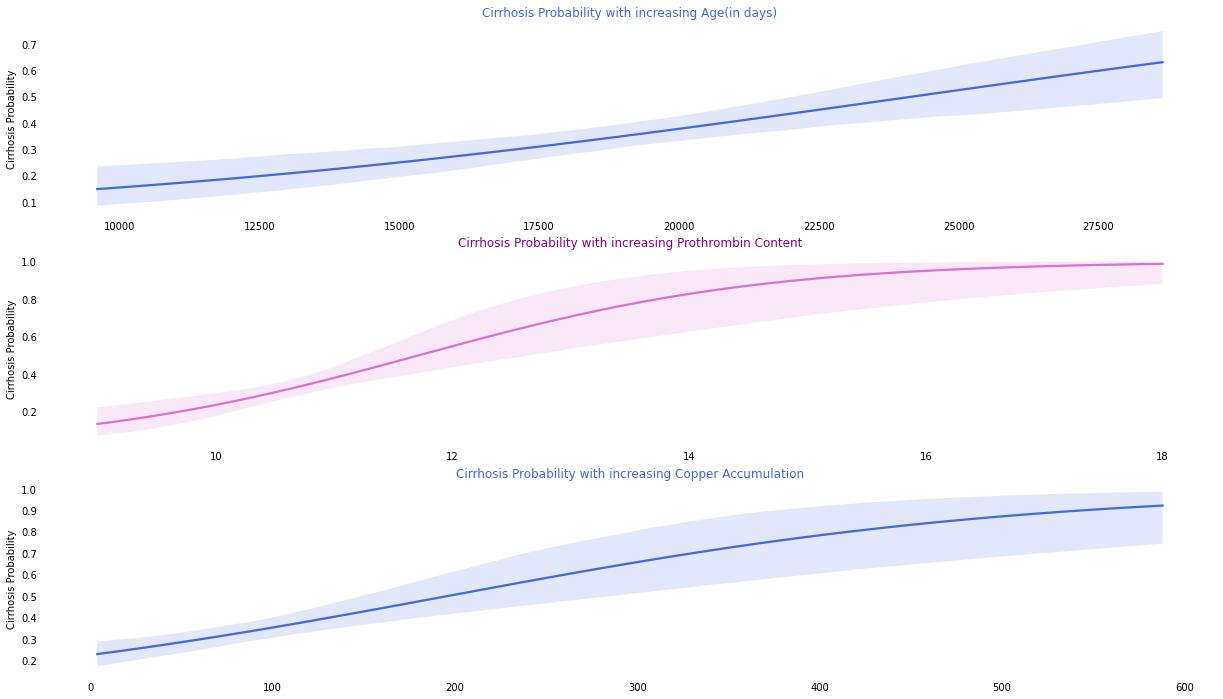

In [ ]:
#@title Regression Plots of Positive Correlated Features.
plt.figure(figsize=(21,12))

plt.subplot(3,1,1)
sns.regplot(x=df['Age'], y=df['Stage'], scatter=False, logistic=True, color='royalblue')
sns.despine(fig=None, ax=None, top=True, right=True, left=True, bottom=True, offset=None, trim=False);
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
plt.xlabel('');
plt.ylabel('Cirrhosis Probability');
plt.setp(plt.title('Cirrhosis Probability with increasing Age(in days)'), color='royalblue') ;

plt.subplot(3,1,2)
sns.regplot(x=df['Prothrombin'], y=df['Stage'], scatter=False, logistic=True, color='orchid');
sns.despine(fig=None, ax=None, top=True, right=True, left=True, bottom=True, offset=None, trim=False);
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
plt.xlabel('');
plt.ylabel('Cirrhosis Probability');
plt.setp(plt.title('Cirrhosis Probability with increasing Prothrombin Content'), color='darkmagenta');

plt.subplot(3,1,3)
sns.regplot(x=df['Copper'], y=df['Stage'], scatter=False, logistic=True, color='royalblue')
sns.despine(fig=None, ax=None, top=True, right=True, left=True, bottom=True, offset=None, trim=False);
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
plt.xlabel('');
plt.ylabel('Cirrhosis Probability');
plt.setp(plt.title('Cirrhosis Probability with increasing Copper Accumulation'), color='royalblue') ;

Looks like the data checks with our intuition. These parameters indeed increase
the risk of the disease

We can also observe some features such as Platelets, Albumin, Cholesterol where the probability of disease decrease with increase in feature value. Lets tally that with some more regression plots.

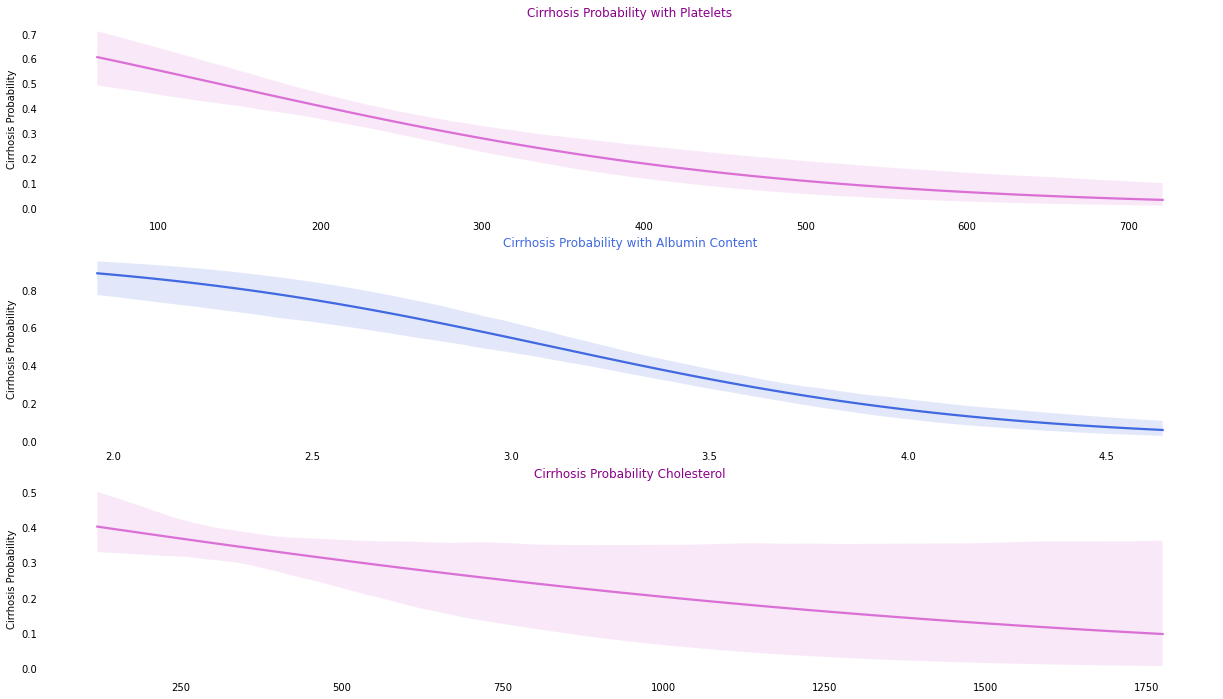

In [ ]:
#@title Regression Plots of negatively correlated Features.
plt.figure(figsize=(21,12))

plt.subplot(3,1,1)
sns.regplot(x=df['Platelets'], y=df['Stage'], scatter=False, logistic=True, color='orchid')
sns.despine(fig=None, ax=None, top=True, right=True, left=True, bottom=True, offset=None, trim=False);
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
plt.xlabel('');
plt.ylabel('Cirrhosis Probability');
plt.setp(plt.title('Cirrhosis Probability with Platelets'), color='darkmagenta');

plt.subplot(3,1,2)
sns.regplot(x=df['Albumin'], y=df['Stage'], scatter=False, logistic=True, color='royalblue');
sns.despine(fig=None, ax=None, top=True, right=True, left=True, bottom=True, offset=None, trim=False);
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
plt.xlabel('');
plt.ylabel('Cirrhosis Probability');
plt.setp(plt.title('Cirrhosis Probability with Albumin Content'), color='royalblue');

plt.subplot(3,1,3)
sns.regplot(x=df['Cholesterol'], y=df['Stage'], scatter=False, logistic=True, color='orchid')
sns.despine(fig=None, ax=None, top=True, right=True, left=True, bottom=True, offset=None, trim=False);
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
plt.xlabel('');
plt.ylabel('Cirrhosis Probability');
plt.setp(plt.title('Cirrhosis Probability Cholesterol'), color='darkmagenta') ;

Platelets, Albumin checks with our logic the findings about Cholesterol seems interesting! Looks like people with high Cholesterol have lower risk of Cirrhosis, this might not sound correct but our data certainly shows so.

This should help our model predict the target. We will be looking at what features contribute the most in later part of the project.

**Preprocessing data**

Preprocessing the data is used because with the help that we can convert all the categorical type into int type and float type

In [ ]:
# replacing catagorical data with intgers.
df['Sex'] = df['Sex'].replace({'M':0, 'F':1})                                # Male : 0 , Female :1
df['Ascites'] = df['Ascites'].replace({'N':0, 'Y':1})                        # N : 0, Y : 1   
df['Drug'] = df['Drug'].replace({'D-penicillamine':0, 'Placebo':1})          # D-penicillamine : 0, Placebo : 1   
df['Hepatomegaly'] = df['Hepatomegaly'].replace({'N':0, 'Y':1})              # N : 0, Y : 1
df['Spiders'] = df['Spiders'].replace({'N':0, 'Y':1})                        # N : 0, Y : 1
df['Edema'] = df['Edema'].replace({'N':0, 'Y':1, 'S':-1})                    # N : 0, Y : 1, S : -1
df['Status'] = df['Status'].replace({'C':0, 'CL':1, 'D':-1})                 # 'C':0, 'CL':1, 'D':-1

Showing the all the unique elements and their count
by Using the value_counts function for all the features:-

N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage

In [ ]:
df['N_Days'].value_counts()

1434    2
3445    2
1216    2
1329    2
1067    2
       ..
2990    1
3098    1
3150    1
3149    1
976     1
Name: N_Days, Length: 399, dtype: int64

In [ ]:
df['Status'].value_counts()

 0    232
-1    161
 1     25
Name: Status, dtype: int64

In [ ]:
df['Drug'].value_counts()

0    264
1    154
Name: Drug, dtype: int64

In [ ]:
df['Age'].value_counts()

19724    7
18993    6
18628    6
23376    5
22646    5
        ..
15574    1
19295    1
18713    1
20256    1
12784    1
Name: Age, Length: 344, dtype: int64

In [ ]:
df['Sex'].value_counts()

1    374
0     44
Name: Sex, dtype: int64

In [ ]:
df['Ascites'].value_counts()

0    394
1     24
Name: Ascites, dtype: int64

In [ ]:
df['Hepatomegaly'].value_counts()

1    266
0    152
Name: Hepatomegaly, dtype: int64

In [ ]:
df['Spiders'].value_counts()

0    328
1     90
Name: Spiders, dtype: int64

In [ ]:
df['Edema'].value_counts()

 0    354
-1     44
 1     20
Name: Edema, dtype: int64

In [ ]:
df['Bilirubin'].value_counts()

0.7     33
0.6     31
0.5     23
0.8     23
1.1     20
        ..
24.5     1
10.8     1
3.7      1
5.9      1
4.6      1
Name: Bilirubin, Length: 98, dtype: int64

In [ ]:
df['Cholesterol'].value_counts()

309.5    134
260.0      4
316.0      4
448.0      4
257.0      3
        ... 
486.0      1
528.0      1
458.0      1
950.0      1
576.0      1
Name: Cholesterol, Length: 202, dtype: int64

In [ ]:
df[ 'Albumin'].value_counts()

3.35    11
3.50     8
3.60     8
3.40     7
3.65     7
        ..
3.38     1
2.43     1
3.05     1
1.96     1
3.17     1
Name: Albumin, Length: 154, dtype: int64

In [ ]:
df['Copper'].value_counts()

73.0     113
52.0       8
67.0       7
58.0       6
75.0       6
        ... 
178.0      1
110.0      1
154.0      1
269.0      1
186.0      1
Name: Copper, Length: 158, dtype: int64

In [ ]:
df['Alk_Phos'].value_counts()

1259.0    106
7277.0      2
1009.0      2
674.0       2
1636.0      2
         ... 
2404.0      1
754.0       1
979.0       1
1040.0      1
1056.0      1
Name: Alk_Phos, Length: 296, dtype: int64

In [ ]:
df['SGOT'].value_counts()

114.70    108
71.30       6
137.95      5
97.65       5
120.90      5
         ... 
104.49      1
67.08       1
136.74      1
173.60      1
136.00      1
Name: SGOT, Length: 179, dtype: int64

In [ ]:
df['Tryglicerides'].value_counts()

108.0    141
118.0      7
91.0       6
90.0       6
68.0       5
        ... 
272.0      1
318.0      1
243.0      1
598.0      1
82.0       1
Name: Tryglicerides, Length: 146, dtype: int64

In [ ]:
df['Platelets'].value_counts()

251.0    14
344.0     6
165.0     5
269.0     5
213.0     5
         ..
140.0     1
301.0     1
339.0     1
108.0     1
350.0     1
Name: Platelets, Length: 243, dtype: int64

In [ ]:
df['Prothrombin'].value_counts()

10.6    41
11.0    32
10.0    25
9.9     24
9.8     22
10.1    22
10.3    17
10.8    16
10.9    15
10.2    15
10.4    15
9.6     14
11.2    13
10.5    13
11.5    12
11.1    12
10.7    11
9.7     11
9.5      9
12.0     8
11.6     6
11.7     6
11.4     6
12.1     5
11.3     4
13.0     4
12.4     4
11.8     4
12.3     3
12.2     3
13.2     3
11.9     2
9.4      2
12.7     2
13.6     2
12.9     2
9.0      2
9.1      1
13.1     1
13.8     1
18.0     1
9.2      1
15.2     1
13.3     1
14.1     1
12.6     1
17.1     1
9.3      1
Name: Prothrombin, dtype: int64

In [ ]:
df['Stage'].value_counts()

0    274
1    144
Name: Stage, dtype: int64

Dropping the ID colum

In [ ]:
df=df.drop(['ID'],axis=1)

Plotting the box plot to check for outliers

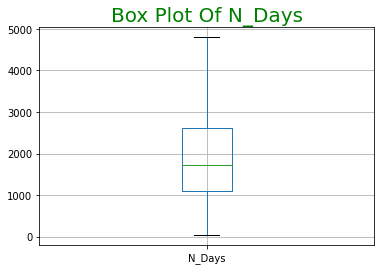

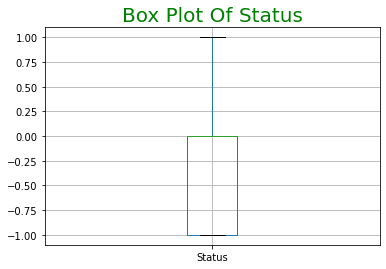

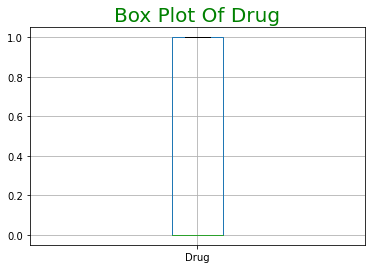

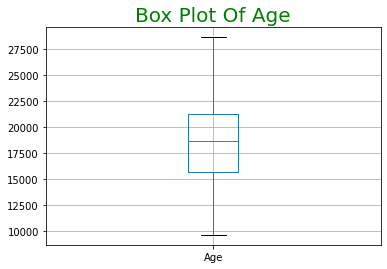

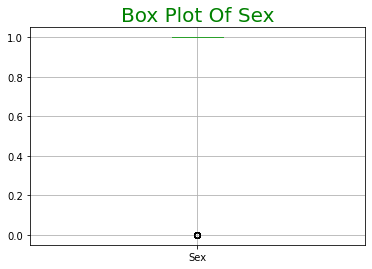

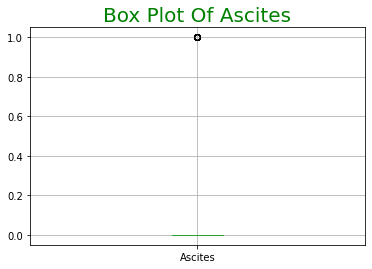

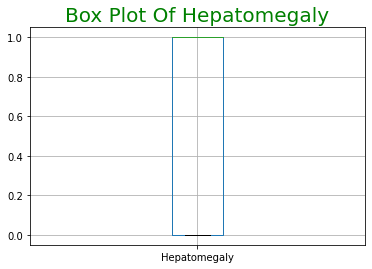

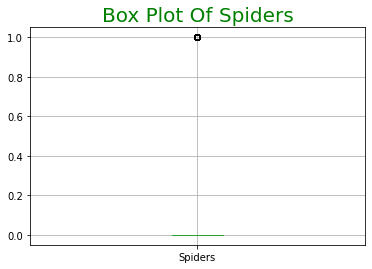

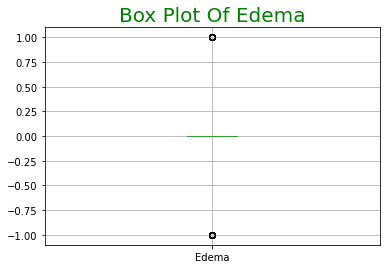

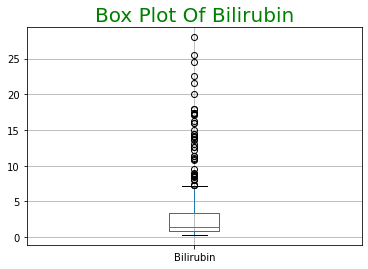

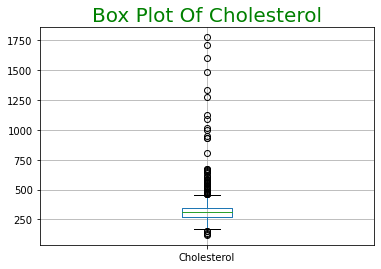

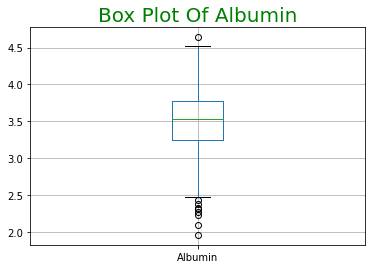

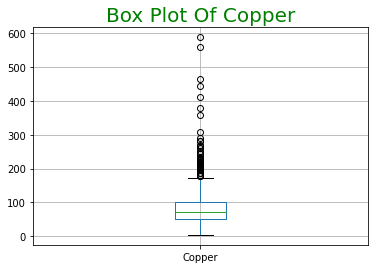

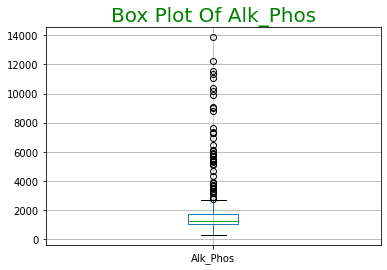

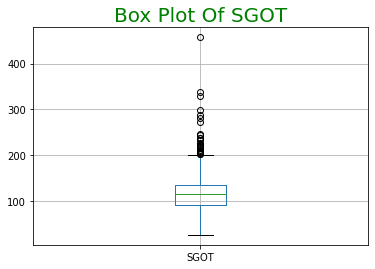

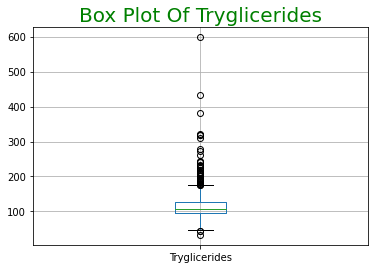

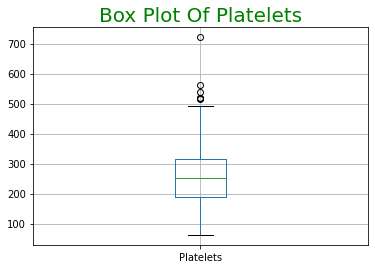

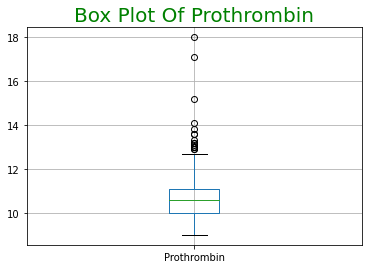

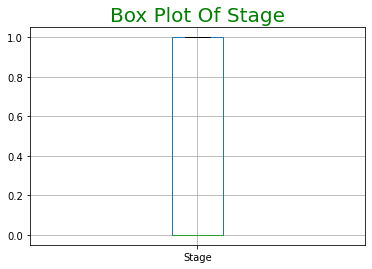

In [ ]:
columns=df.columns
for i in columns:
    df.iloc[:,:].boxplot(column = i)
    plt.title(f"Box Plot Of {i}" , fontsize=20,color="green")
    plt.show()

Assigning the features which have outliers to the columns for eliminating the outliers using the Z-Score  

In [ ]:
  columns=['Sex','Ascites','Spiders','Edema','Bilirubin','Cholesterol','Albumin','Copper','Alk_Phos','SGOT','Tryglicerides','Platelets',
          'Prothrombin']

In [ ]:
# function for dropping outliers

def drop_outliers_zscore(dfcopy:pd.DataFrame, cols, threshold:int=3, inplace:bool=False):
    '''
    input:  dfcopy            ==> the dataframe that contains outliers
            cols  list / str  ==> list of strings (names of columns that have outliers)
            inplace           ==> if True,  method will edit the original dataframe
                                if False, method will return the new dataframe
            threshold         ==> maximum and minimun threshold of zscore
    
    output: df:        ==>clean dataframe
    this method drops outliers from data using zscore method
    '''
    if inplace:
        global df
    else:
        df = dfcopy.copy()

    def drop_col(df_, col):
        
        mean, std = np.mean(df_[col]), np.std(df_[col])
        df_['is_outlier'] = df_[col].apply(lambda x : np.abs((x - mean) / std) > threshold)
        outliers_idx = df_.loc[df_['is_outlier']].index
        df_ = df_.drop(outliers_idx, axis=0)
        
        df = df_.drop('is_outlier', axis=1)
        return df


    if type(cols) == str:
        df = drop_col(df, cols)
    elif type(cols) == list:
        for col in cols:
            df = drop_col(df, col)
    else :
        raise ValueError('Pass neither list nor string in {Cols}')
    
    if inplace:
        
        dfcopy = df
    else:
        return df
    
THRESHOLD = 4
num_outlier_records =  df.shape[0] - drop_outliers_zscore(df, columns, threshold=THRESHOLD).shape[0]
print(f'Number of Outliers {num_outlier_records}, with threshold, with threshold {THRESHOLD}')

drop_outliers_zscore(df, columns, threshold=THRESHOLD, inplace=True)

Number of Outliers 57, with threshold, with threshold 4


Analysing the all the features using the distplot and boxplot 

distplot :- It is a plot, In which we can see the composition of a feature

boxplot  :- It is a plot, In which we can see the distribution of a feature



Skewness is : 0.42214375388811226


Text(0.5, 1.0, 'Analysis of.N_Days')

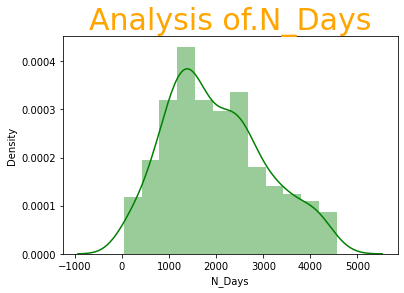

In [ ]:
sns.distplot(df.N_Days,color='green')
print("Skewness is :",df.N_Days.skew())
plt.title(f"Analysis of.N_Days" , fontsize=30,color="orange")

Text(0.5, 1.0, 'Analysis of.N_Days - Box Plot')

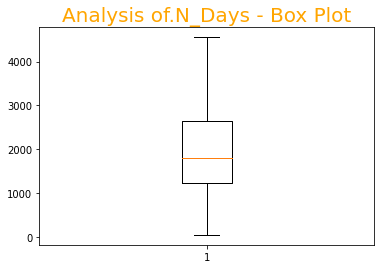

In [ ]:
#boxplot for.N_Days
plt.boxplot(df.N_Days)
plt.title(f"Analysis of.N_Days - Box Plot" , fontsize=20,color="orange")

Skewness is : -0.048430438718340935


Text(0.5, 1.0, 'Analysis of Status')

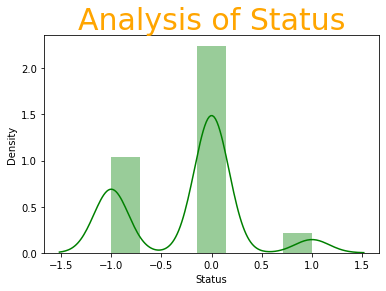

In [ ]:
sns.distplot(df.Status,color='green')
print("Skewness is :",df.Status.skew())
plt.title(f"Analysis of Status" , fontsize=30,color="orange")

Text(0.5, 1.0, 'Analysis of Status - Box Plot')

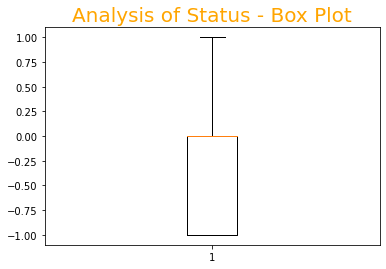

In [ ]:
#boxplot for Status
plt.boxplot(df.Status)
plt.title(f"Analysis of Status - Box Plot" , fontsize=20,color="orange")

Skewness is : 0.6046916066282821


Text(0.5, 1.0, 'Analysis of Drug ')

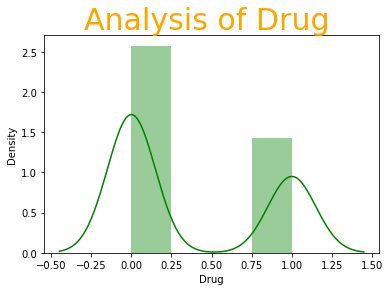

In [ ]:
sns.distplot(df.Drug,color='green')
print("Skewness is :",df.Drug.skew())
plt.title(f"Analysis of Drug ",fontsize=30,color="orange")

Text(0.5, 1.0, 'Analysis of Drug - Box Plot')

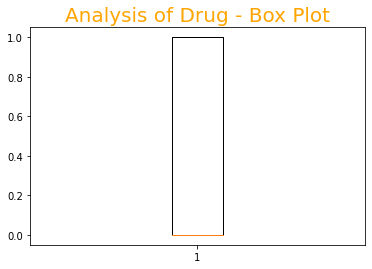

In [ ]:
#boxplot for 'Drug'
plt.boxplot(df.Drug)
plt.title(f"Analysis of Drug - Box Plot" , fontsize=20,color="orange")

Skewness is : 0.05556711306672871


Text(0.5, 1.0, 'Analysis of Age')

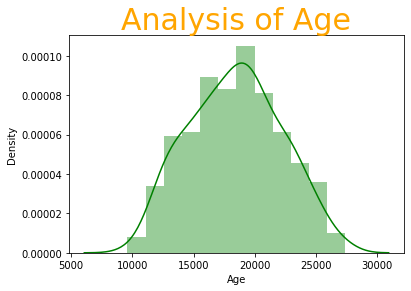

In [ ]:
sns.distplot(df.Age,color='green')
print("Skewness is :",df.Age.skew())
plt.title(f"Analysis of Age" , fontsize=30,color="orange")

Text(0.5, 1.0, 'Analysis of Age - Box Plot')

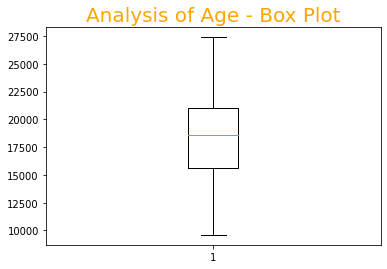

In [ ]:
#boxplot for Age
plt.boxplot(df.Age)
plt.title(f"Analysis of Age - Box Plot" , fontsize=20,color="orange")

Skewness is : -2.6248375461886577


Text(0.5, 1.0, 'Analysis of Sex')

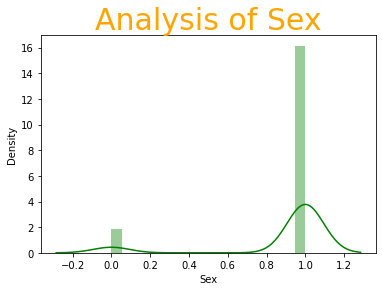

In [ ]:
sns.distplot(df.Sex,color='green')
print("Skewness is :",df.Sex.skew())
plt.title(f"Analysis of Sex" , fontsize=30,color="orange")

Text(0.5, 1.0, 'Analysis of Sex - Box Plot')

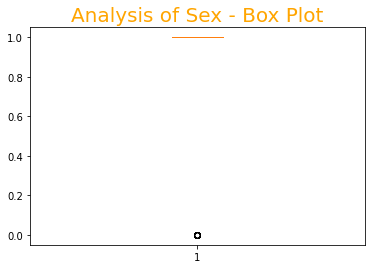

In [ ]:
#boxplot for Sex
plt.boxplot(df.Sex)
plt.title(f"Analysis of Sex - Box Plot" , fontsize=20,color="orange")

Skewness is : 0


Text(0.5, 1.0, 'Analysis of Ascites')

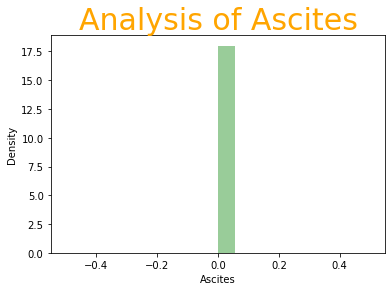

In [ ]:
sns.distplot(df.Ascites,color='green')
print("Skewness is :",df.Ascites.skew())
plt.title(f"Analysis of Ascites" , fontsize=30,color="orange")

Text(0.5, 1.0, 'Analysis of Ascites - Box Plot')

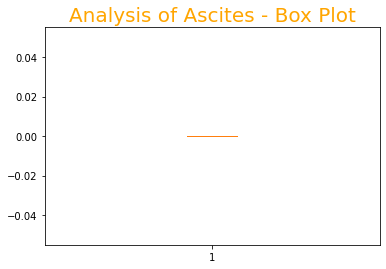

In [ ]:
#boxplot for Ascites
plt.boxplot(df.Ascites)
plt.title(f"Analysis of Ascites - Box Plot" , fontsize=20,color="orange")

Skewness is : -0.473487392034737


Text(0.5, 1.0, 'Analysis of Hepatomegaly')

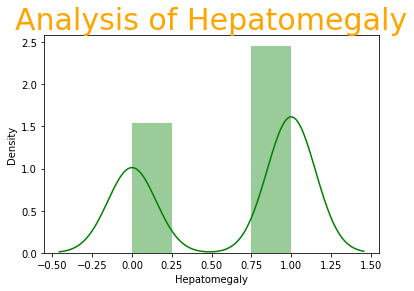

In [ ]:
sns.distplot(df.Hepatomegaly,color='green')
print("Skewness is :",df.Hepatomegaly.skew())
plt.title(f"Analysis of Hepatomegaly" , fontsize=30,color="orange")

Text(0.5, 1.0, 'Analysis of Hepatomegaly - Box Plot')

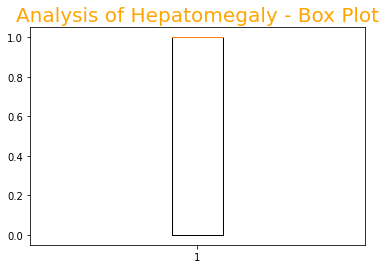

In [ ]:
#boxplot for Hepatomegaly
plt.boxplot(df.Hepatomegaly)
plt.title(f"Analysis of Hepatomegaly - Box Plot" , fontsize=20,color="orange")

Skewness is : 1.8751270366111938


Text(0.5, 1.0, 'Analysis of Spiders')

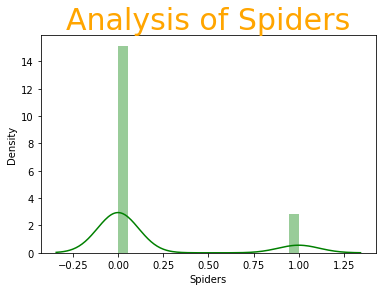

In [ ]:
sns.distplot(df.Spiders,color='green')
print("Skewness is :",df.Spiders.skew())
plt.title(f"Analysis of Spiders" , fontsize=30,color="orange")

Text(0.5, 1.0, 'Analysis of Spiders - Box Plot')

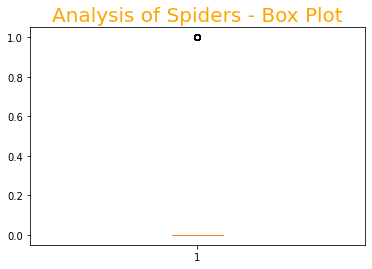

In [ ]:
#boxplot for Spiders
plt.boxplot(df.Spiders)
plt.title(f"Analysis of Spiders - Box Plot" , fontsize=20,color="orange")

Skewness is : -1.9542588986896465


Text(0.5, 1.0, 'Analysis of Edema')

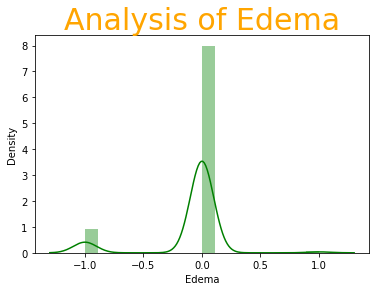

In [ ]:
sns.distplot(df.Edema,color='green')
print("Skewness is :",df.Edema.skew())
plt.title(f"Analysis of Edema" , fontsize=30,color="orange")

Text(0.5, 1.0, 'Analysis of Edema - Box Plot')

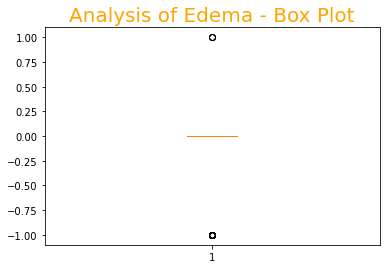

In [ ]:
#boxplot for Edema
plt.boxplot(df.Edema)
plt.title(f"Analysis of Edema - Box Plot" , fontsize=20,color="orange")

Skewness is : 2.5479955497661475


Text(0.5, 1.0, 'Analysis of Bilirubin')

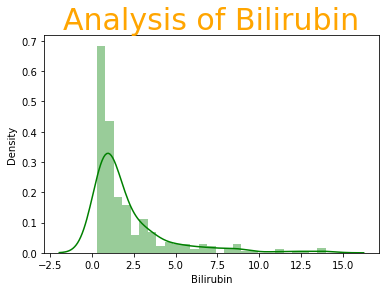

In [ ]:
sns.distplot(df.Bilirubin,color='green')
print("Skewness is :",df.Bilirubin.skew())
plt.title(f"Analysis of Bilirubin" , fontsize=30,color="orange")

Text(0.5, 1.0, 'Analysis of Bilirubin - Box Plot')

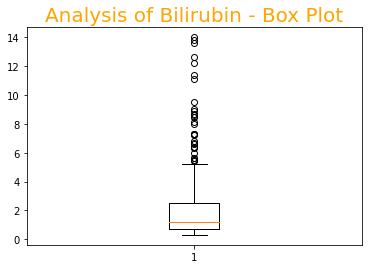

In [ ]:
#boxplot for Bilirubin
plt.boxplot(df.Bilirubin)
plt.title(f"Analysis of Bilirubin - Box Plot" , fontsize=20,color="orange")

Skewness is : 1.4089891317725185


Text(0.5, 1.0, 'Analysis of Cholesterol')

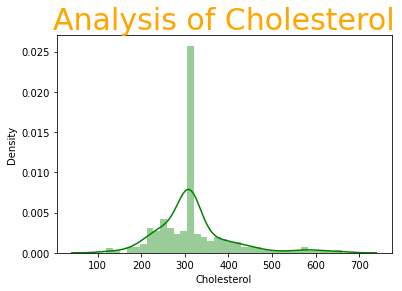

In [ ]:
sns.distplot(df.Cholesterol,color='green')
print("Skewness is :",df.Cholesterol.skew())
plt.title(f"Analysis of Cholesterol" , fontsize=30,color="orange")

Text(0.5, 1.0, 'Analysis of Cholesterol - Box Plot')

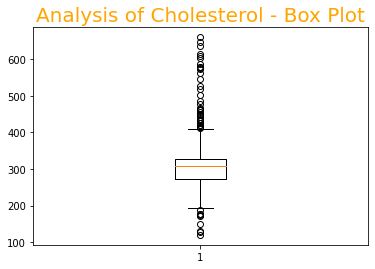

In [ ]:
#boxplot for Cholesterol
plt.boxplot(df.Cholesterol)
plt.title(f"Analysis of Cholesterol - Box Plot" , fontsize=20,color="orange")

Skewness is : -0.4326053253328873


Text(0.5, 1.0, 'Analysis of Albumin')

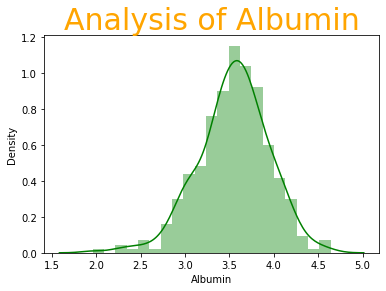

In [ ]:
sns.distplot(df.Albumin,color='green')
print("Skewness is :",df.Albumin.skew())
plt.title(f"Analysis of Albumin" , fontsize=30,color="orange")

Text(0.5, 1.0, 'Analysis of Albumin - Box Plot')

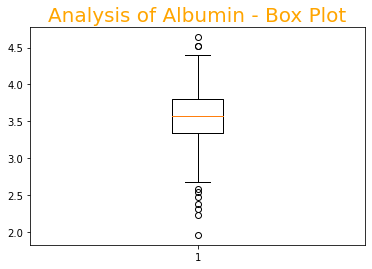

In [ ]:
#boxplot for Albumin
plt.boxplot(df.Albumin)
plt.title(f"Analysis of Albumin - Box Plot" , fontsize=20,color="orange")

Skewness is : 1.6582965893100394


Text(0.5, 1.0, 'Analysis of Copper')

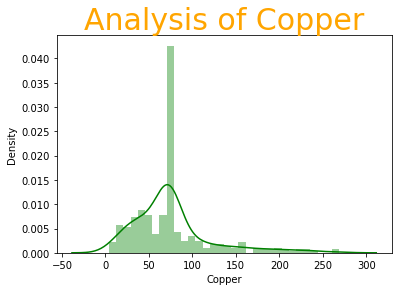

In [ ]:
sns.distplot(df.Copper,color='green')
print("Skewness is :",df.Copper.skew())
plt.title(f"Analysis of Copper" , fontsize=30,color="orange")

Text(0.5, 1.0, 'Analysis of Copper - Box Plot')

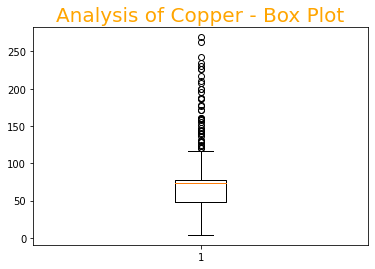

In [ ]:
#boxplot for Copper
plt.boxplot(df.Copper)
plt.title(f"Analysis of Copper - Box Plot" , fontsize=20,color="orange")

Skewness is : 3.308236943281724


Text(0.5, 1.0, 'Analysis of Alk_Phos')

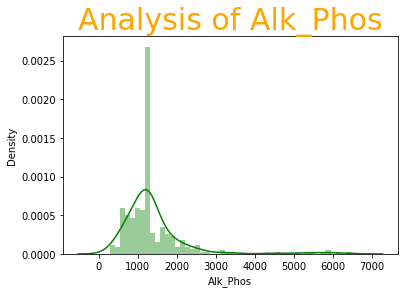

In [ ]:
sns.distplot(df.Alk_Phos,color='green')
print("Skewness is :",df.Alk_Phos.skew())
plt.title(f"Analysis of Alk_Phos" , fontsize=30,color="orange")

Text(0.5, 1.0, 'Analysis of Alk_Phos - Box Plot')

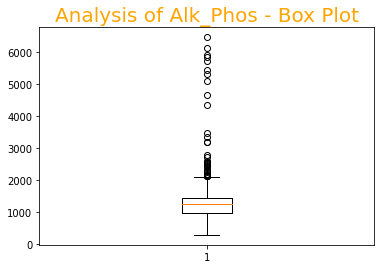

In [ ]:
#boxplot for Alk_Phos
plt.boxplot(df.Alk_Phos)
plt.title(f"Analysis of Alk_Phos - Box Plot" , fontsize=20,color="orange")

Skewness is : 0.6948642613797568


Text(0.5, 1.0, 'Analysis of SGOT')

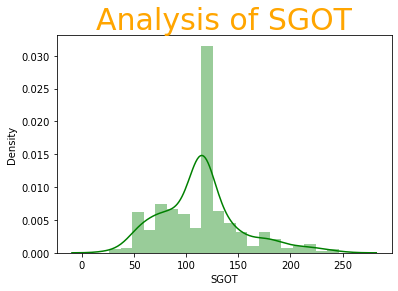

In [ ]:
sns.distplot(df.SGOT,color='green')
print("Skewness is :",df.SGOT.skew())
plt.title(f"Analysis of SGOT" , fontsize=30,color="orange")

Text(0.5, 1.0, 'Analysis of SGOT - Box Plot')

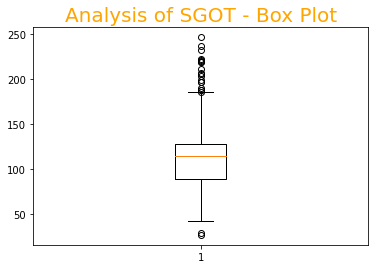

In [ ]:
#boxplot for SGOT
plt.boxplot(df.SGOT)
plt.title(f"Analysis of SGOT - Box Plot" , fontsize=20,color="orange")

Skewness is : 1.3631846687072668


Text(0.5, 1.0, 'Analysis of Tryglicerides')

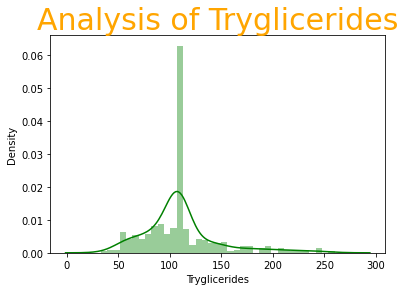

In [ ]:
sns.distplot(df.Tryglicerides,color='green')
print("Skewness is :",df.Tryglicerides.skew())
plt.title(f"Analysis of Tryglicerides" , fontsize=30,color="orange")

Text(0.5, 1.0, 'Analysis of Tryglicerides - Box Plot')

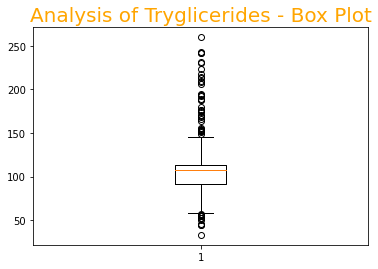

In [ ]:
#boxplot for Tryglicerides
plt.boxplot(df.Tryglicerides)
plt.title(f"Analysis of Tryglicerides - Box Plot" , fontsize=20,color="orange")

Skewness is : 0.4310272334597492


Text(0.5, 1.0, 'Analysis of Platelets')

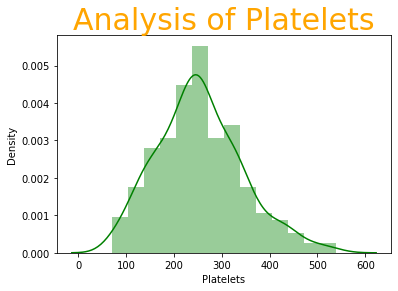

In [ ]:
sns.distplot(df.Platelets,color='green')
print("Skewness is :",df.Platelets.skew())
plt.title(f"Analysis of Platelets" , fontsize=30,color="orange")

Text(0.5, 1.0, 'Analysis of Platelets - Box Plot')

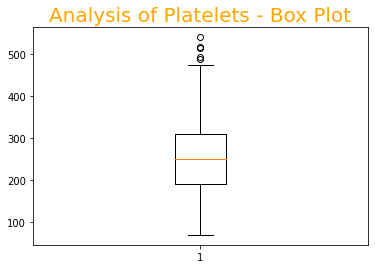

In [ ]:
#boxplot for Platelets
plt.boxplot(df.Platelets)
plt.title(f"Analysis of Platelets - Box Plot" , fontsize=20,color="orange")

Skewness is : 1.086129458460347


Text(0.5, 1.0, 'Analysis of Prothrombin')

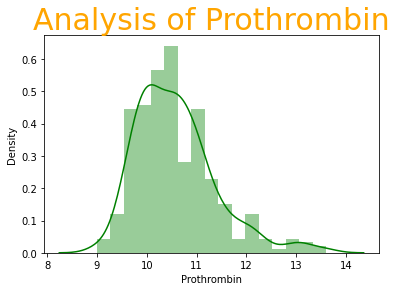

In [ ]:
sns.distplot(df.Prothrombin,color='green')
print("Skewness is :",df.Prothrombin.skew())
plt.title(f"Analysis of Prothrombin" , fontsize=30,color="orange")

Text(0.5, 1.0, 'Analysis of Prothrombin - Box Plot')

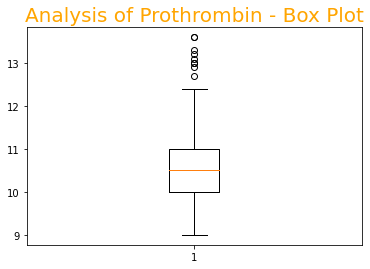

In [ ]:
#boxplot for Prothrombin
plt.boxplot(df.Prothrombin)
plt.title(f"Analysis of Prothrombin - Box Plot" , fontsize=20,color="orange")

Skewness is : 0.8163412002899577


Text(0.5, 1.0, 'Analysis of Stage')

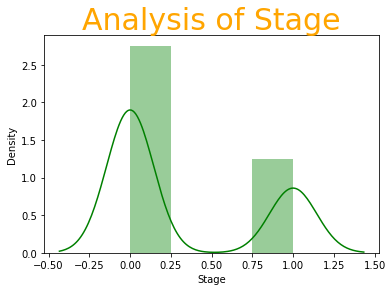

In [ ]:
sns.distplot(df.Stage,color='green')
print("Skewness is :",df.Stage.skew())
plt.title(f"Analysis of Stage" , fontsize=30,color="orange")

Text(0.5, 1.0, 'Analysis of Stage - Box Plot')

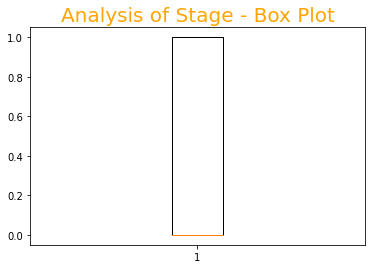

In [ ]:
#boxplot for Stage
plt.boxplot(df.Stage)
plt.title(f"Analysis of Stage - Box Plot" , fontsize=20,color="orange")

By using Pairplot we can draw the graph for every feature with every feature

Text(0.5, 1.0, 'Pairplot')

<Figure size 720x360 with 0 Axes>

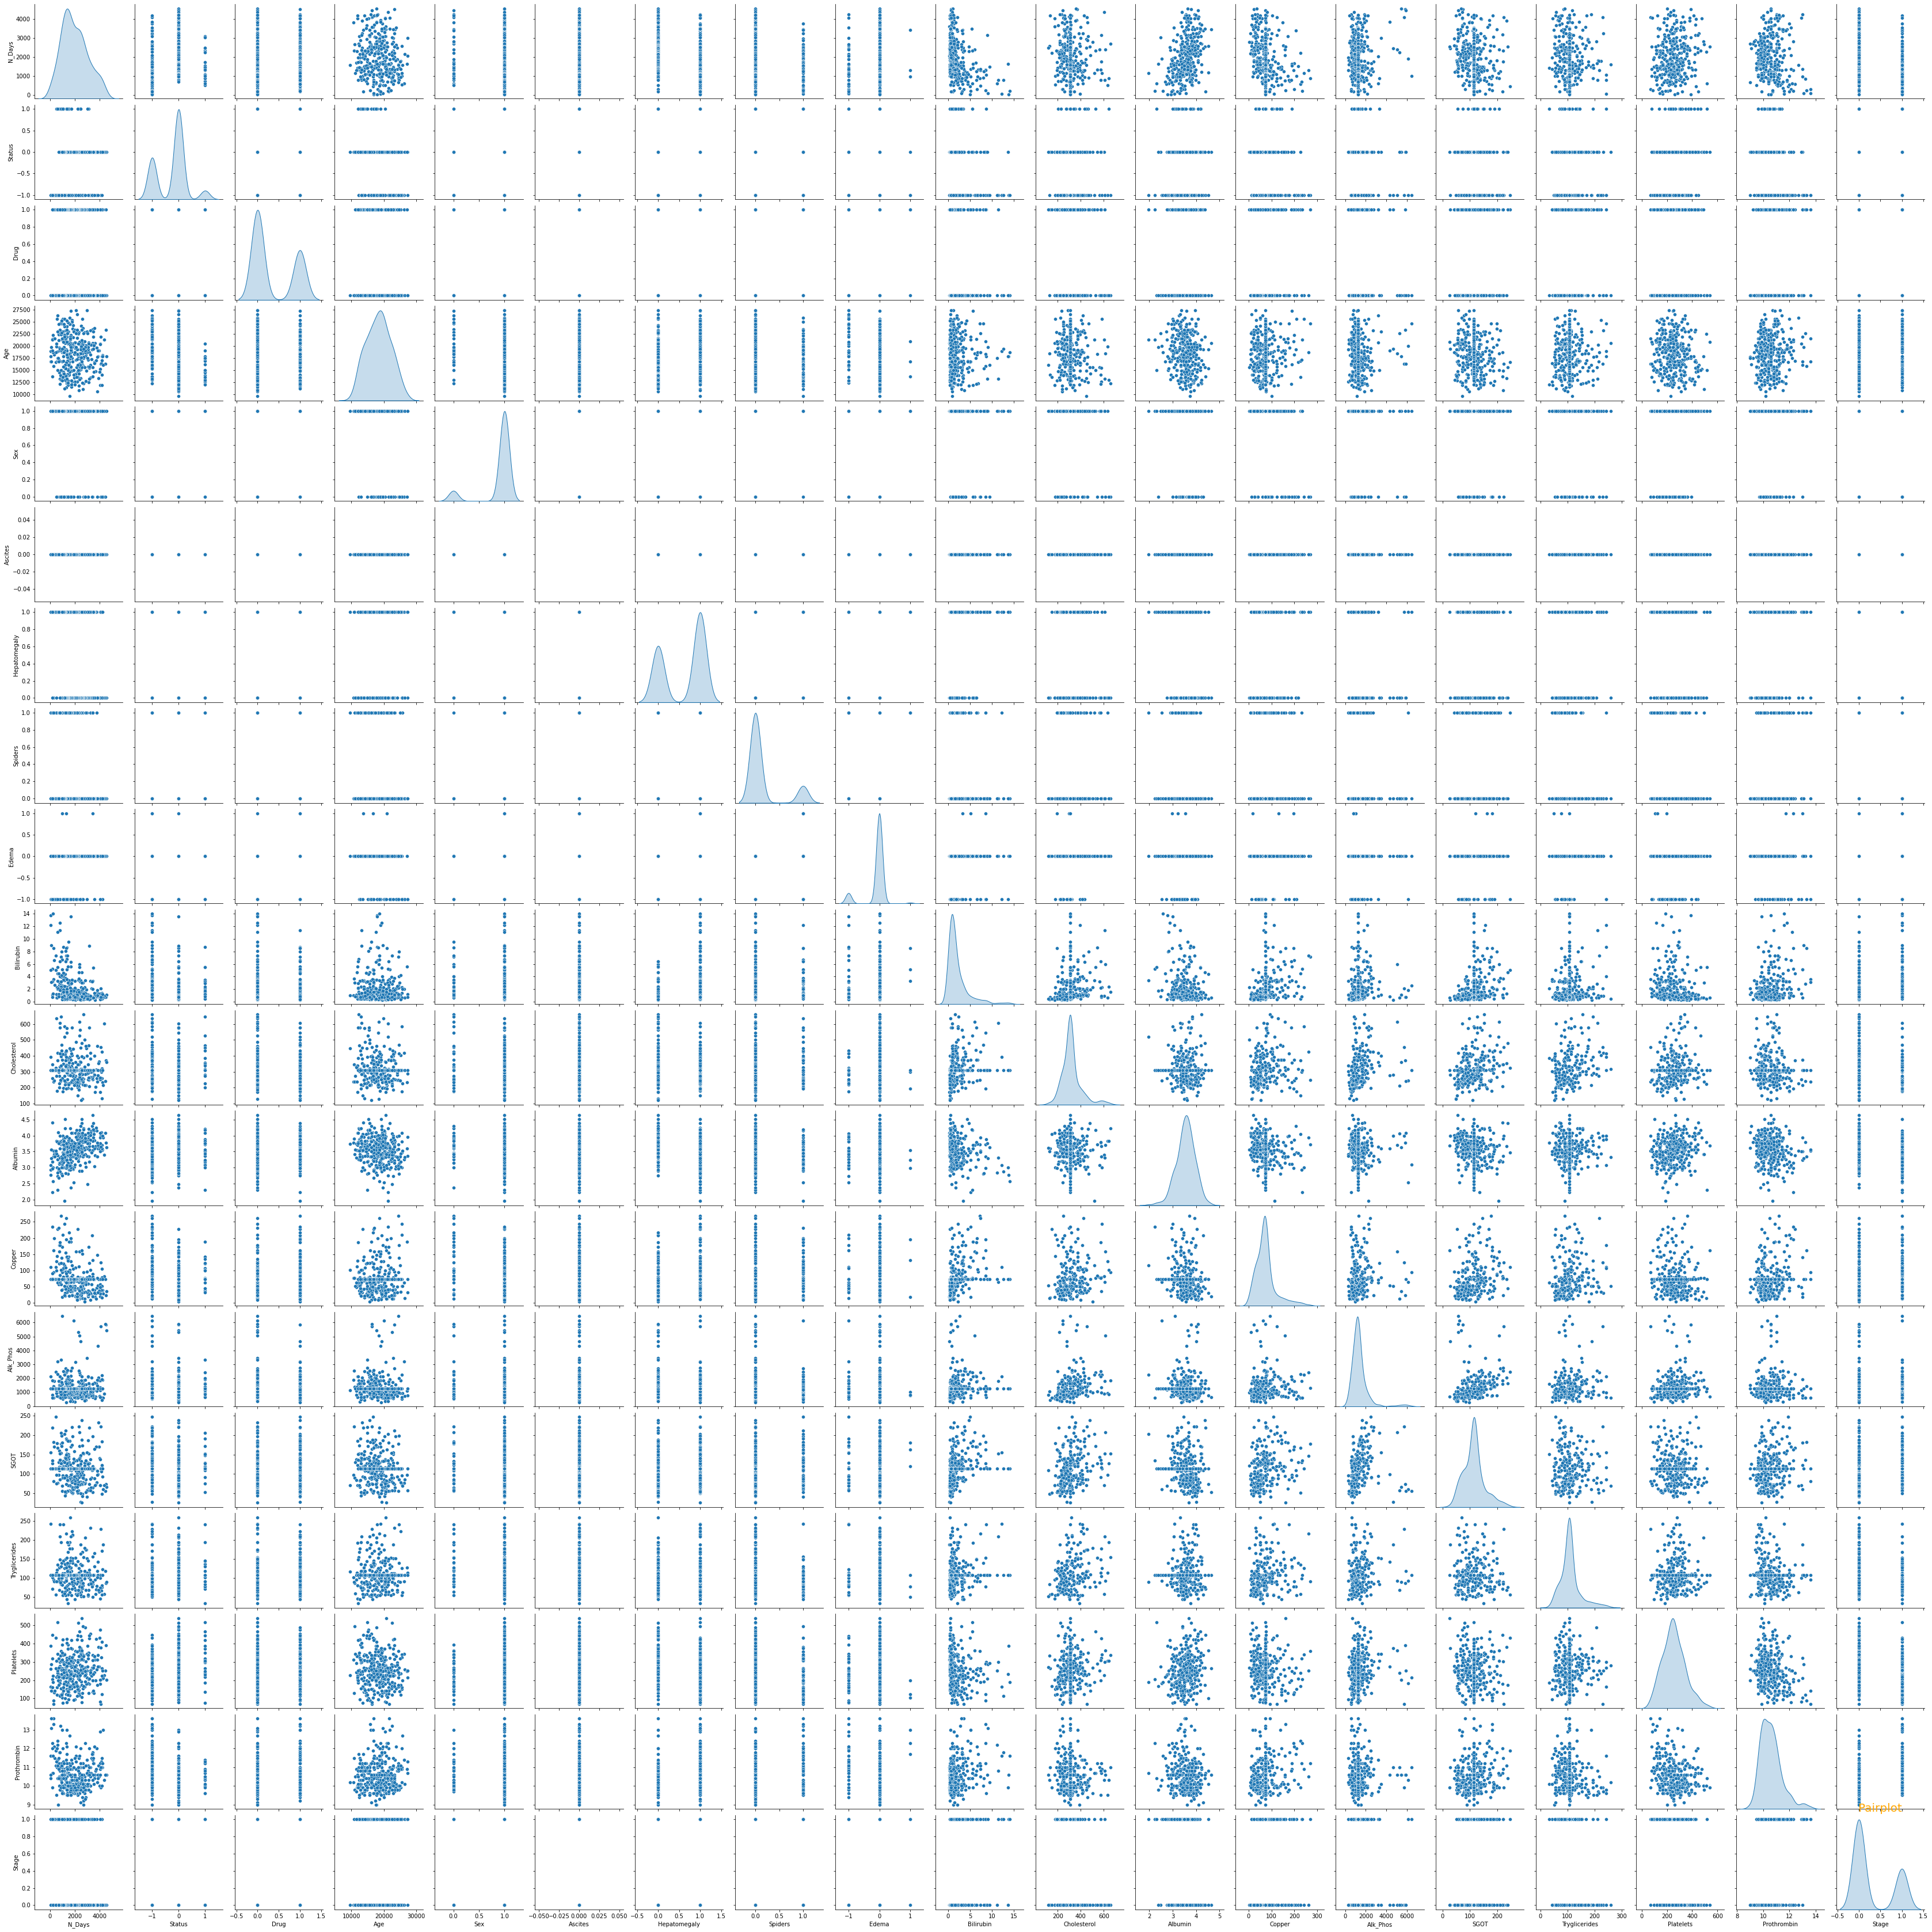

In [ ]:
# plot all the variables and confirm our above deduction with more confidence
plt.figure(figsize=(10,5))
sns.pairplot(df, diag_kind = 'kde')
plt.title(f"Pairplot" , fontsize=20,color="orange")

Removing the Ascites feature As it is doesn't show any variation

In [ ]:
df=df.drop(['Ascites'], axis=1)

corr() is used to find the pairwise correlation of all columns in the Pandas Dataframe in Python

In [ ]:
# corelatoin between the different features
corr = df.corr(method ='pearson')
corr

,N_Days,Status,Drug,Age,Sex,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
N_Days,1.000000,0.229107,0.089644,-0.101570,-0.004376,-0.301846,-0.103961,0.145235,-0.395385,-0.080663,0.404188,-0.315515,0.108974,-0.160097,-0.093369,0.131748,-0.099282,-0.307081
Status,0.229107,1.000000,0.016399,-0.293429,0.153994,-0.173598,-0.091940,0.091051,-0.279702,-0.056616,0.131991,-0.213850,-0.130516,-0.164693,-0.020404,0.203359,-0.334643,-0.219677
Drug,0.089644,0.016399,1.000000,-0.124317,0.009216,-0.143640,0.181217,0.045734,-0.012554,-0.057147,0.047928,0.061687,-0.027893,0.018017,0.070540,0.066178,0.067098,0.030190
Age,-0.101570,-0.293429,-0.124317,1.000000,-0.133723,0.184910,-0.113623,-0.157881,-0.052205,-0.087733,-0.167683,0.055791,-0.002910,-0.150503,0.034470,-0.115400,0.076422,0.172974
Sex,-0.004376,0.153994,0.009216,-0.133723,1.000000,-0.049427,0.120717,0.021297,-0.092041,-0.138837,-0.048230,-0.332812,-0.106708,-0.059678,-0.147201,0.051362,-0.098854,-0.022738
Hepatomegaly,-0.301846,-0.173598,-0.143640,0.184910,-0.049427,1.000000,0.062928,-0.081564,0.256556,-0.029846,-0.279465,0.218058,-0.032102,0.123457,0.089677,-0.256939,0.197502,0.350196
Spiders,-0.103961,-0.091940,0.181217,-0.113623,0.120717,0.062928,1.000000,0.002066,0.138328,-0.006514,-0.109473,0.164991,-0.004394,0.112457,-0.144630,-0.115681,0.195071,0.176577
Edema,0.145235,0.091051,0.045734,-0.157881,0.021297,-0.081564,0.002066,1.000000,-0.064384,0.036696,0.087221,-0.009284,-0.048338,0.001255,-0.032990,0.048124,-0.153314,-0.139019
Bilirubin,-0.395385,-0.279702,-0.012554,-0.052205,-0.092041,0.256556,0.138328,-0.064384,1.000000,0.206609,-0.279539,0.344553,0.083499,0.315345,0.159948,-0.123038,0.270810,0.269142
Cholesterol,-0.080663,-0.056616,-0.057147,-0.087733,-0.138837,-0.029846,-0.006514,0.036696,0.206609,1.000000,-0.023139,0.166821,0.229051,0.312746,0.307394,0.114981,-0.109077,-0.046159


Text(0.5, 1.0, 'Heatmap')

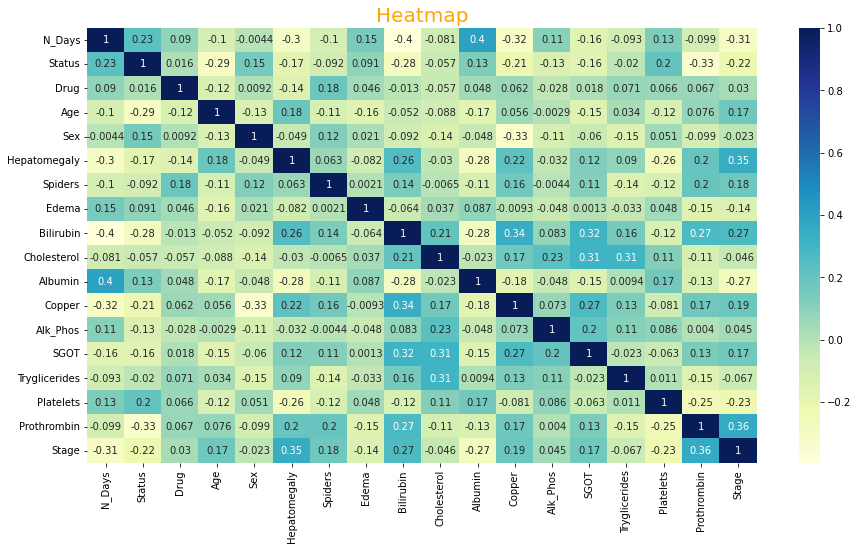

In [ ]:
# Plotting heatmap
plt.subplots(figsize =(15, 8)) 
sns.heatmap(corr,cmap="YlGnBu",annot=True)
plt.title(f"Heatmap" , fontsize=20,color="orange")

# **Conclusion of EDA**

After performing EDA we can observe that Ascites feature doesn't show any variation so we can remove that feature as it is an entry level there is no need to take any other additional data.

Making the data flexible to train the machine learning model

   By making the nan values to be filled by their respective methods

        1.  For categorical filling with mode
        2.  For numerical filling with median

By analysing with different graphs by using Matplotlib and Seaborn

Removed unnecessary features 

In [ ]:
#@title Model Building
x = df.drop(['Status','N_Days','Stage'], axis=1)
y = df.pop('Stage')

In [ ]:
#@title splitting into train and testing data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=1/5,random_state=0)

[Text(0.452755905511811, 0.9545454545454546, 'X[14] <= 10.75\ngini = 0.442\nsamples = 255\nvalue = [171, 84]'),
 Text(0.22736220472440946, 0.8636363636363636, 'X[8] <= 3.335\ngini = 0.32\nsamples = 160\nvalue = [128, 32]'),
 Text(0.11811023622047244, 0.7727272727272727, 'X[11] <= 147.25\ngini = 0.493\nsamples = 34\nvalue = [19, 15]'),
 Text(0.07874015748031496, 0.6818181818181818, 'X[13] <= 284.5\ngini = 0.444\nsamples = 27\nvalue = [18, 9]'),
 Text(0.047244094488188976, 0.5909090909090909, 'X[9] <= 90.5\ngini = 0.32\nsamples = 20\nvalue = [16, 4]'),
 Text(0.031496062992125984, 0.5, 'X[1] <= 23011.0\ngini = 0.198\nsamples = 18\nvalue = [16, 2]'),
 Text(0.015748031496062992, 0.4090909090909091, 'gini = 0.0\nsamples = 15\nvalue = [15, 0]'),
 Text(0.047244094488188976, 0.4090909090909091, 'X[14] <= 10.05\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(0.031496062992125984, 0.3181818181818182, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.06299212598425197, 0.3181818181818182, 'g

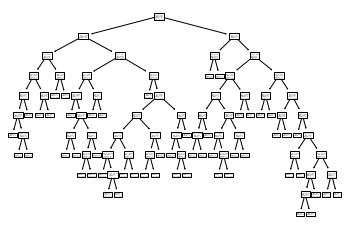

In [ ]:
#@title DecisionTreeClassifier
dtree=tree.DecisionTreeClassifier()
dtree.fit(x_train,y_train)
tree.plot_tree(dtree)

In [ ]:
dc_pred=dtree.predict(x_test)
dc_pred

array([1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0])

**Cross Validation and Predicting the Accuracy of a model**

**Cross Validation** :- It is a technique for evaluating ML models by training several ML models on subsets of the available input data and evaluating them on the complementary subset of the data.

Here we are using the kfold cross validation technique for the accuracy

In [ ]:
cv = KFold(n_splits=10, random_state=1, shuffle=True)
scores = cross_val_score(dtree,x_train,y_train,scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy after kfold cross validation: %.3f' % (mean(scores)*100))
#print('Accuracy ',accuracy_score(y_test,dc_pred)*100)

Accuracy after kfold cross validation: 65.446


In [ ]:
#@title SVM Classifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
svm_clf=Pipeline([
    ("scaler",StandardScaler()),
    ("linear_svc",LinearSVC(C=1,loss="hinge"))
])

In [ ]:
svm_clf.fit(x_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc', LinearSVC(C=1, loss='hinge'))])

In [ ]:
svm_pred=svm_clf.predict(x_test)
svm_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1])

In [ ]:
cv = KFold(n_splits=10, random_state=1, shuffle=True)
scores = cross_val_score(svm_clf,x_train,y_train,scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy after kfold cross validation: %.3f' % (mean(scores)*100))
#print('Accuracy ',accuracy_score(y_test,svm_pred)*100)

Accuracy after kfold cross validation: 76.154


In [ ]:
#@title Logistic regression
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(random_state=0).fit(x_train,y_train)

In [ ]:
lr_pred=lr.predict(x_test)
print(lr_pred)

[0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0
 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 1 1 0 1]


In [ ]:
cv = KFold(n_splits=10, random_state=1, shuffle=True)
scores = cross_val_score(lr,x_train,y_train,scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy after kfold cross validation: %.3f' % (mean(scores)*100))
#print('Accuracy ',accuracy_score(y_test,lr_pred)*100)

Accuracy after kfold cross validation: 70.662


In [ ]:
#@title Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(n_estimators = 100, random_state = 0)
RF.fit(x_train,y_train)

RandomForestClassifier(random_state=0)

In [ ]:
RF_pred=RF.predict(x_test)
print(RF_pred)

[1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0
 1 1 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1]


In [ ]:
cv = KFold(n_splits=10, random_state=1, shuffle=True)
scores = cross_val_score(RF,x_train,y_train,scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy after kfold cross validation: %.3f' % (mean(scores)*100))
print('Accuracy ',accuracy_score(y_test,RF_pred)*100)

Accuracy after kfold cross validation: 74.615


In [ ]:
#@title KNeighborsClassifier()
KNN=KNeighborsClassifier()
KNN.fit(x_train,y_train)

KNeighborsClassifier()

In [ ]:
KNN_pred=KNN.predict(x_test)
print(KNN_pred)

[0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 1 0 1 0 0 1 0 0 1 0 0
 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0
 1 1 0 0 0 0 1 0 0 0 0]


In [ ]:
cv = KFold(n_splits=10, random_state=1, shuffle=True)
scores = cross_val_score(KNN,x_train,y_train,scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy after kfold cross validation: %.3f' % (mean(scores)*100))
#print('Accuracy ',accuracy_score(y_test,KNN_pred)*100)

Accuracy after kfold cross validation: 67.046


In [ ]:
#@title NaiveBayes Classifier
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(x_train,y_train)

GaussianNB()

In [ ]:
nb_pred=nb.predict(x_test)
print(nb_pred)

[1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 1 1 0 0 1 0 0 0 0 1 0 0 0 0
 1 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 1]


In [ ]:
cv = KFold(n_splits=10, random_state=1, shuffle=True)
scores = cross_val_score(nb,x_train,y_train,scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy after kfold cross validation: %.3f' % (mean(scores)*100))
#print('Accuracy ',accuracy_score(y_test,nb_pred)*100)

Accuracy after kfold cross validation: 72.246


In [ ]:
from sklearn import naive_bayes
# Application of all Machine Learning methods
MLA = [
    #GLM
    linear_model.LogisticRegressionCV(),
    #Ensemble Methods
    ensemble.RandomForestClassifier(),
    #SVM
    svm.LinearSVC(),
    #Trees    
    tree.DecisionTreeClassifier(),
    #Navies Bayes
    naive_bayes.GaussianNB(),
    #Nearest Neighbor
    neighbors.KNeighborsClassifier()
]

comparing the various classifiers based on some features 

Train Accuracy :- accuracy after training model and testing on the same training set	
Test Accuracy	 :- accuracy after training model and testing on the test set

Precission     :-	It is a performance metrics used for pattern recognition and classification in machine learning.

Recall	       :- It is a performance metrics used for pattern recognition and classification in machine learning.

AUC            :-AUC-ROC curve is a performance measurement metric of a classification model at different threshold values. Firstly, let's understand ROC (Receiver Operating Characteristic curve) curve

In [ ]:
MLA_columns = []
MLA_compare = pd.DataFrame(columns = MLA_columns)

row_index = 0
for alg in MLA:  
    
    predicted = alg.fit(x_train, y_train).predict(x_test)
    fp, tp, th = roc_curve(y_test, predicted)
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index,'MLA used'] = MLA_name
    MLA_compare.loc[row_index, 'Train Accuracy'] = round(alg.score(x_train, y_train), 4)*100
    MLA_compare.loc[row_index, 'Test Accuracy'] = round(alg.score(x_test, y_test), 4)*100
    MLA_compare.loc[row_index, 'Precission'] = precision_score(y_test, predicted)*100
    MLA_compare.loc[row_index, 'Recall'] = recall_score(y_test, predicted)*100
    MLA_compare.loc[row_index, 'AUC'] = auc(fp, tp)*100

    row_index+=1
    
MLA_compare.sort_values(by = ['Test Accuracy'], ascending = False, inplace = True)
MLA_compare

,MLA used,Train Accuracy,Test Accuracy,Precission,Recall,AUC
5,KNeighborsClassifier,81.57,78.82,61.111111,50.000000,69.444444
4,GaussianNB,75.69,77.65,57.142857,54.545455,70.129870
0,LogisticRegressionCV,79.22,76.47,55.000000,50.000000,67.857143
2,LinearSVC,79.22,76.47,55.555556,45.454545,66.378066
1,RandomForestClassifier,100.00,72.94,47.368421,40.909091,62.518038
3,DecisionTreeClassifier,100.00,67.06,37.500000,40.909091,58.549784


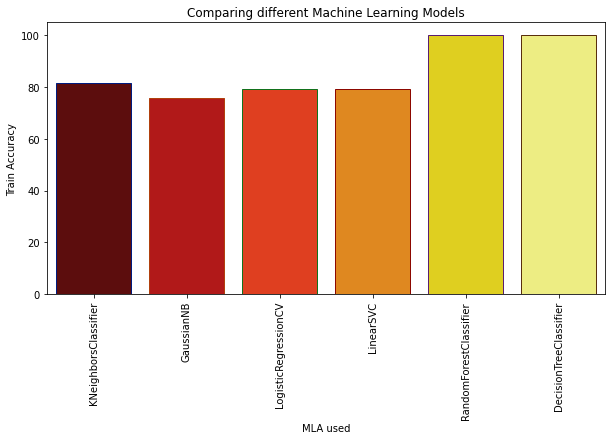

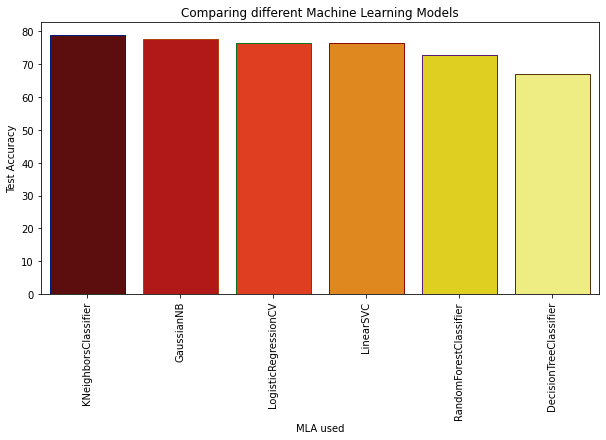

In [ ]:
# Creating plots to compare Train Accuracy of the MLAs
plt.figure(figsize=(10,5))
plt.subplot()
sns.barplot(x="MLA used", y="Train Accuracy",data=MLA_compare,palette='hot',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('Comparing different Machine Learning Models')
plt.show()
# Creating plots to compare Test Accuracy of the MLAs
plt.figure(figsize=(10,5))
plt.subplot()
sns.barplot(x="MLA used", y="Test Accuracy",data=MLA_compare,palette='hot',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('Comparing different Machine Learning Models')
plt.show()

# **Conclusion**


Here totally we used 5 classifiers for training the model and for predicting the output

As every classifier worked well considering various featuers and performances.We have to decide one model.
So,My conclusion is to use the **random forest classifier** to use for this data set to predict whether the **cirrhosis** is present or not